# Desafío Data Science Latam

## Importa librerías

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

## Carga archivo de datos

In [3]:
latamDF = pd.read_csv('dataset_SCL.csv', parse_dates=['Fecha-I','Fecha-O'])
latamDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

C:\Users\an2fe\anaconda3v2\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Pregunta 1
### ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

Los datos estan claramente diferenciados entre programados y operado, lo cual facilita determinar cuáles vuelos se retrasaron. En ambos casos (programado y operado), se incluye información en la fecha y hora, número de vuelo, ciudades de origen y destino, y código de la aerolinea.

Adicionalmente se incluye columnas individuales para el dia, mes, y año en que los vuelos fueron operados. Inicialmente esta información parece redundante con la columna "Fecha-O". Adicionalmente se incluye el día de la semana, el cuál puede ser relevante para predecir el retraso de un vuelo.

Una columna con el tipo de vuelo (Nacional o Internacional), la cuál también puede ser de importancia para la predicción.

Finalmente, se tienen tres columnas con los nombres completos de la aerolinea operadora, ciudad de origen y ciudad de destino. Esta información es redundante con las columnas "Ori-O", "Des-O", "Emp-O".  

A continuación se realizará una exploración de los datos para conocer más en detalle la distribución de los datos en el tiempo.

In [6]:
#Agrupa los vuelos por año
latamDF.groupby(latamDF['Fecha-O'].dt.year).count()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
Fecha-O,,,,,,,,,,,,,,,,,,
2017,68204,68204,68204,68204,68204,68204,68203,68204,68204,68204,68204,68204,68204,68204,68204,68204,68204,68204
2018,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


La gran mayoría de los vuelos incluidos en el dataset son del 2017, por lo cual el año será irrelevante para el análisis

In [7]:
#Muestra los 2 vuelos del 2018
latamDF[latamDF['Fecha-O'].dt.year==2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


Los 2 vuelos operados en el 2018 fueron vuelos programados para el 31 de Diciembre del 2017 cercanos a la medianoche, y se retrasaron lo suficiente como para ser operados en el 2018.

In [20]:
#Agrupa y muestra los vuelos por por mes y día
latamDF.groupby(pd.Grouper(key='Fecha-I',freq='1D')).count()

,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
Fecha-I,,,,,,,,,,,,,,,,,
2017-01-01,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170
2017-01-02,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198
2017-01-03,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195
2017-01-04,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193
2017-01-05,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217
2017-12-28,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213
2017-12-29,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220


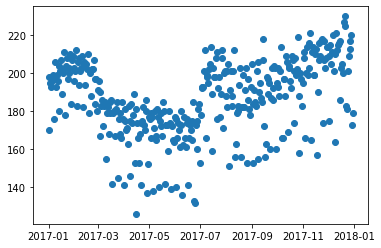

In [39]:
#Grafica la distribución de los vuelos por mes y día
countMD = latamDF.groupby(pd.Grouper(key='Fecha-I',freq='1D')).count()
plt.scatter(countMD.index,countMD['Fecha-O'])

Se nota un claro decrecimiento en el número de vuelos entre marzo y julio.  Desde julio, los vuelos incrementan constantemente hasta el final del año (aparentemente de manera lineal).  Enero y febrero también muestran un grán número de vuelos.

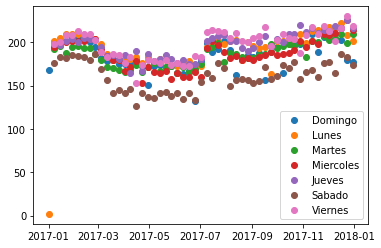

In [63]:
#Revisa la distribución por los días de la semana
#El ciclo for se utiliza para aislar los vuelos correspondientes a cada día de la semana
#Y añadir 7 scatter plots a la misma gráfica
weekD = latamDF.DIANOM.unique().tolist()
for x in weekD:
    latamDF_week = latamDF.loc[latamDF['DIANOM']==x]
    countMD = latamDF_week.groupby(pd.Grouper(key='Fecha-I',freq='W')).count()
    ax = plt.scatter(countMD.index,countMD['Fecha-O'],label=x)

plt.legend();
plt.show()

Se observa que los sabados tienen un menor número de vuelos de manera consistente, mientras los jueves y viernes tienden a ser los días con un mayor número de vuelos.

## Resumen pregunta 1
Todos los vuelos incluidos en el dataset son del 2017, por lo cual el año será irrelevante para el análisis.  Existen 2 vuelos que fueron operados en el 2018, los cuales fueron programados para el 31 de Diciembre del 2017 cercanos a la medianoche, y se retrasaron lo suficiente como para ser operados el primero de enero del 2018.

El número de vuelos entre marzo y julio es mucho menor que el resto del año.  Desde julio, los vuelos incrementan constantemente hasta el final del año (aparentemente de manera lineal).  Enero y febrero también muestran un grán número de vuelos.

Los sabados tienen un menor número de vuelos de manera consistente a través del año, mientras los jueves y viernes tienden a ser los días con un mayor número de vuelos.

# Pregunta 2
## Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv 

In [68]:
#Temporada alta
#Defino función que realiza la diferenciación entre temporada alta y temporada baja
def temporada(row):  
    if (row['Fecha-I'] > pd.Timestamp(2017, 12, 15) or row['Fecha-I'] < pd.Timestamp(2017, 3, 3)) or (row['Fecha-I'] > pd.Timestamp(2017, 9, 11) and row['Fecha-I'] < pd.Timestamp(2017, 9, 30)):
        return 1
    else:
        return 0

#Aplico la función a todo el dataframe original
latamDF['temporada_alta']=latamDF.apply(lambda row: temporada(row),axis=1)


In [80]:
#dif_mim
#Calcula la diferencia entre las fechas y luego la convierte a minutos
latamDF['dif_min'] = (latamDF['Fecha-O'] - latamDF['Fecha-I'])
latamDF['dif_min'] = latamDF['dif_min']/np.timedelta64(1,'m')

In [82]:
#atraso_15
#Defino función que realiza la diferenciación entre atraso o no
def se_atraso(row):  
    if row['dif_min'] > 15:
        return 1
    else:
        return 0

#Aplico la función a todo el dataframe
latamDF['atraso_15']=latamDF.apply(lambda row: se_atraso(row),axis=1)

In [99]:
#periodo_dia
#Defino función que realiza la diferenciación entre las horas del día
def periodo(row):  
    if row['Fecha-I'].hour >= 5  and (row['Fecha-I'].hour <= 11 and  row['Fecha-I'].hour <= 59):
        return 'mañana'
    elif row['Fecha-I'].hour >= 12 and (row['Fecha-I'].hour <= 18 and  row['Fecha-I'].hour <= 59):
#        return 'tarde'
    else:
        return 'noche'

#Aplico la función a todo el dataframe
latamDF['periodo_dia']=latamDF.apply(lambda row: periodo(row),axis=1)   